In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import OpenWeather_API_KEY
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [5]:
cities

['kawalu',
 'ushuaia',
 'mpika',
 'kodiak',
 'iqaluit',
 'acapulco',
 'rikitea',
 'punta arenas',
 'mount isa',
 'hermanus',
 'amderma',
 'pekan',
 'victoria',
 'bredasdorp',
 'te anau',
 'acarau',
 'taolanaro',
 'okhotsk',
 'puerto ayora',
 'suntar',
 'butaritari',
 'tsuyama',
 'vanavara',
 'castro',
 'sirsi',
 'puerto baquerizo moreno',
 'airai',
 'ola',
 'joensuu',
 'manggar',
 'geraldton',
 'vaini',
 'thompson',
 'xinzhou',
 'mataura',
 'saint-philippe',
 'atuona',
 'rorvik',
 'cape town',
 'cayenne',
 'pevek',
 'kumluca',
 'buchanan',
 'port alfred',
 'nizhneyansk',
 'bay roberts',
 'molchanovo',
 'nanortalik',
 'san jose',
 'mahebourg',
 'port blair',
 'lompoc',
 'coulihaut',
 'touros',
 'hambantota',
 'sao joao da barra',
 'khonuu',
 'yellowknife',
 'haibowan',
 'hilo',
 'barrow',
 'tuktoyaktuk',
 'albany',
 'porecatu',
 'kapaa',
 'kimbe',
 'asau',
 'oktyabrskoye',
 'high prairie',
 'santa rosa',
 'georgetown',
 'asyut',
 'rapid valley',
 'hicaque',
 'belushya guba',
 'port eliz

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + OpenWeather_API_KEY

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kawalu
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | mpika
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | acapulco
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | mount isa
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | amderma
City not found. Skipping...
Processing Record 12 of Set 1 | pekan
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | te anau
Processing Record 16 of Set 1 | acarau
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | okhotsk
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | suntar
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | tsuyam

Processing Record 40 of Set 4 | san felipe
Processing Record 41 of Set 4 | lunenburg
Processing Record 42 of Set 4 | kavieng
Processing Record 43 of Set 4 | angoram
Processing Record 44 of Set 4 | kastamonu
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | payo
Processing Record 47 of Set 4 | katsuura
Processing Record 48 of Set 4 | marawi
Processing Record 49 of Set 4 | venezuela
Processing Record 50 of Set 4 | bushehr
Processing Record 1 of Set 5 | uyemskiy
Processing Record 2 of Set 5 | oktyabrskiy
Processing Record 3 of Set 5 | chuy
Processing Record 4 of Set 5 | mildura
Processing Record 5 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 5 | kumeny
Processing Record 7 of Set 5 | discovery bay
Processing Record 8 of Set 5 | yenisea
City not found. Skipping...
Processing Record 9 of Set 5 | richards bay
Processing Record 10 of Set 5 | kuytun
Processing Record 11 of Set 5 | robertsport
Processing Record 12 of Set 5 | jaynagar-majil

Processing Record 26 of Set 8 | de aar
Processing Record 27 of Set 8 | sorland
Processing Record 28 of Set 8 | segou
Processing Record 29 of Set 8 | ca mau
Processing Record 30 of Set 8 | tarudant
City not found. Skipping...
Processing Record 31 of Set 8 | husavik
Processing Record 32 of Set 8 | san cristobal
Processing Record 33 of Set 8 | mae sai
Processing Record 34 of Set 8 | severobaykalsk
Processing Record 35 of Set 8 | santiago del estero
Processing Record 36 of Set 8 | a
City not found. Skipping...
Processing Record 37 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 8 | rovaniemi
Processing Record 39 of Set 8 | port lincoln
Processing Record 40 of Set 8 | chechat
Processing Record 41 of Set 8 | ancud
Processing Record 42 of Set 8 | aldan
Processing Record 43 of Set 8 | woodward
Processing Record 44 of Set 8 | portland
Processing Record 45 of Set 8 | micheweni
Processing Record 46 of Set 8 | nicolas bravo
Processing Record 47 of Set 8 | mahadday weyne

Processing Record 11 of Set 12 | peruibe
Processing Record 12 of Set 12 | thinadhoo
Processing Record 13 of Set 12 | poum
Processing Record 14 of Set 12 | margate
Processing Record 15 of Set 12 | quesnel
Processing Record 16 of Set 12 | zhob
Processing Record 17 of Set 12 | goderich
Processing Record 18 of Set 12 | saint-leu
Processing Record 19 of Set 12 | lishu
Processing Record 20 of Set 12 | makokou
Processing Record 21 of Set 12 | camana
Processing Record 22 of Set 12 | tawkar
City not found. Skipping...
Processing Record 23 of Set 12 | umm durman
City not found. Skipping...
Processing Record 24 of Set 12 | launceston
Processing Record 25 of Set 12 | loughrea
Processing Record 26 of Set 12 | camacha
Processing Record 27 of Set 12 | bathsheba
Processing Record 28 of Set 12 | tapes
Processing Record 29 of Set 12 | kedougou
Processing Record 30 of Set 12 | waipawa
Processing Record 31 of Set 12 | los andes
Processing Record 32 of Set 12 | malartic
Processing Record 33 of Set 12 | ana

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kawalu,-7.3817,108.2082,75.65,91,100,0.18,ID,2022-03-10 08:22:33
1,Ushuaia,-54.8000,-68.3000,46.06,71,100,17.27,AR,2022-03-10 08:21:33
2,Mpika,-11.8343,31.4529,67.37,89,100,5.30,ZM,2022-03-10 08:22:33
3,Kodiak,57.7900,-152.4072,40.51,93,100,10.36,US,2022-03-10 08:22:33
4,Iqaluit,63.7506,-68.5145,-13.27,75,100,2.30,CA,2022-03-10 08:22:34
5,Acapulco,16.8634,-99.8901,69.62,88,0,2.30,MX,2022-03-10 08:20:38
6,Rikitea,-23.1203,-134.9692,78.69,70,93,10.29,PF,2022-03-10 08:22:34
7,Punta Arenas,-53.1500,-70.9167,44.71,81,20,8.05,CL,2022-03-10 08:22:35
8,Mount Isa,-20.7333,139.5000,98.37,18,12,6.91,AU,2022-03-10 08:22:35
9,Hermanus,-34.4187,19.2345,75.90,67,26,10.07,ZA,2022-03-10 08:22:35


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

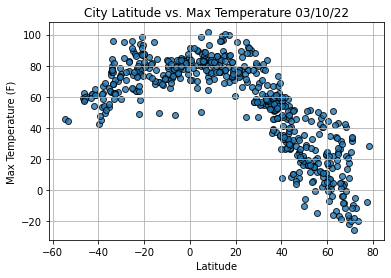

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

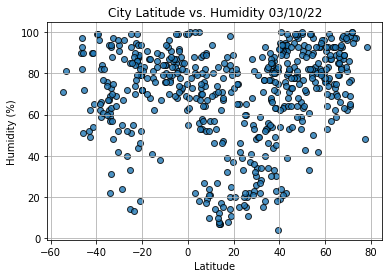

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

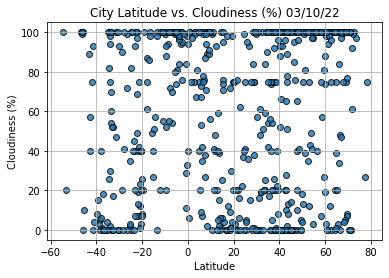

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

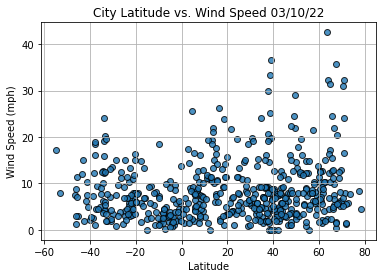

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()